In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = np.loadtxt("Synthetic/29/train.txt",delimiter=",")

In [3]:
train_data_classes = np.asarray([train_data[np.where(train_data[:,2]==i)] for i in [1,2]])

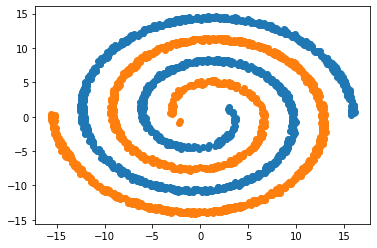

In [4]:
plt.scatter(train_data_classes[0,:,0],train_data_classes[0,:,1])
plt.scatter(train_data_classes[1,:,0],train_data_classes[1,:,1])
plt.show()

In [27]:
def k_means(data,k=15):
    # reshape data for numpy broadcasting
    data = np.reshape(data,[-1,1,data.shape[-1]])
    # initialize k means with random means
    myrange = np.linspace(0,data.shape[0]-1,k,dtype = np.int64)
    kmeans = np.vstack([data[myrange,0,i] for i in range(0,data.shape[-1])]).T
    # reshape data for numpy broadcasting
    kmeans = np.reshape(kmeans,[1,-1,kmeans.shape[-1]])
    # calculate distances with some broadcasting magic
    dists = np.sum((data - kmeans)**2,axis=2)
    # initialize cluster assignments
    
    # choose n rows from a kxk identity matrix 
    # using an nx1 argmin matrix (ranging from 0 to k-1)
    # to produce an nxk 1-hot encoded matrix
    r_nk_old = np.eye(k)[np.argmin(dists,axis=1)]
    r_nk_new = r_nk_old.copy()
    c = 0
    while True:
        #print(f"Iteration {c}")
        #c+=1
        # move cluster assignments into old variable for comparison
        r_nk_old = r_nk_new.copy()
        # update means
        if np.any(np.sum(r_nk_old,axis=0) == 0):
            print(r_nk_old)
            print("error, 0 sum encountered")
            break
        kmeans = (r_nk_old.T @ np.squeeze(data))/np.reshape(np.sum(r_nk_old,axis=0),[-1,1])
        # update new cluster assignments
        dists = np.sum((data - kmeans)**2,axis=2)
        r_nk_new = np.eye(k)[np.argmin(dists,axis=1)]
        # test for convergence
        if np.all(r_nk_old == r_nk_new):
            break
    return kmeans, r_nk_new

In [37]:
means0,allotments0 = k_means(train_data_classes[0,:,:])
means1,allotments1 = k_means(train_data_classes[1,:,:])

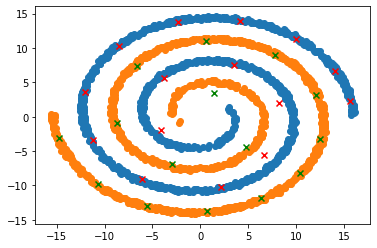

In [38]:
plt.scatter(train_data_classes[0,:,0],train_data_classes[0,:,1])
plt.scatter(train_data_classes[1,:,0],train_data_classes[1,:,1])
plt.scatter(means0[:,0],means0[:,1],c='r',marker='x')
plt.scatter(means1[:,0],means1[:,1],c='g',marker='x')
plt.show()